In [1294]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tab
import dython as dt
from tabulate import tabulate
from pandas.plotting import scatter_matrix
from dython.nominal import associations


In [1295]:
df = pd.read_csv('XY_train.csv',encoding='latin-1')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


#### No duplicate rows in DF

In [1296]:
df.duplicated().sum()

0

## DF info

#### Checking for unique values and describe each column


In [1297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11687 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15015 non-null  object 
 6   education_level         14956 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15278 non-null  object 
 9   company_size            10547 non-null  object 
 10  company_type            10383 non-null  object 
 11  last_new_job            14994 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [1298]:
for col in df.columns:
    print(str(col)+"-")
    print( )
    print(df[str(col)].unique())
    print( )
    print(df[str(col)].describe())
    print( )

enrollee_id-

[13163  9357   604 ... 25935  6525  3366]

count    15326.000000
mean     16887.713167
std       9612.278744
min          1.000000
25%       8594.750000
50%      17013.500000
75%      25186.000000
max      33380.000000
Name: enrollee_id, dtype: float64

city-

['city_16' 'city_136' 'city_145' 'city_160' 'city_84' 'city_139'
 'city_114' 'city_10' 'city_116' 'city_64' 'city_67' 'city_21' 'city_11'
 'city_103' 'city_173' 'city_28' 'city_59' 'city_98' 'city_115' 'city_150'
 'city_104' 'city_50' 'city_71' 'city_74' 'city_83' 'city_65' 'city_36'
 'city_100' 'city_53' 'city_41' 'city_69' 'city_159' 'city_73' 'city_19'
 'city_138' 'city_102' 'city_31' 'city_89' 'city_57' 'city_14' 'city_46'
 'city_27' 'city_175' 'city_141' 'city_90' 'city_61' 'city_75' 'city_142'
 'city_101' 'city_97' 'city_144' 'city_99' 'city_162' 'city_94' 'city_179'
 'city_26' 'city_39' 'city_111' 'city_123' 'city_72' 'city_152' 'city_134'
 'city_117' 'city_91' 'city_155' 'city_23' 'city_149' 'city_77' 'city_

In [1299]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3639
relevent_experience          0
enrolled_university        311
education_level            370
major_discipline          2237
experience                  48
company_size              4779
company_type              4943
last_new_job               332
training_hours               0
target                       0
dtype: int64

#### Slicing extra string in variable city


In [1300]:
df.city = df.city.str.slice(start=5)

### Drawing graphs of all the variable by themself


<ipython-input-1301-4a60738a6802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education_level[df.education_level=='Primary School'] = 'Primary'
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\peleg\

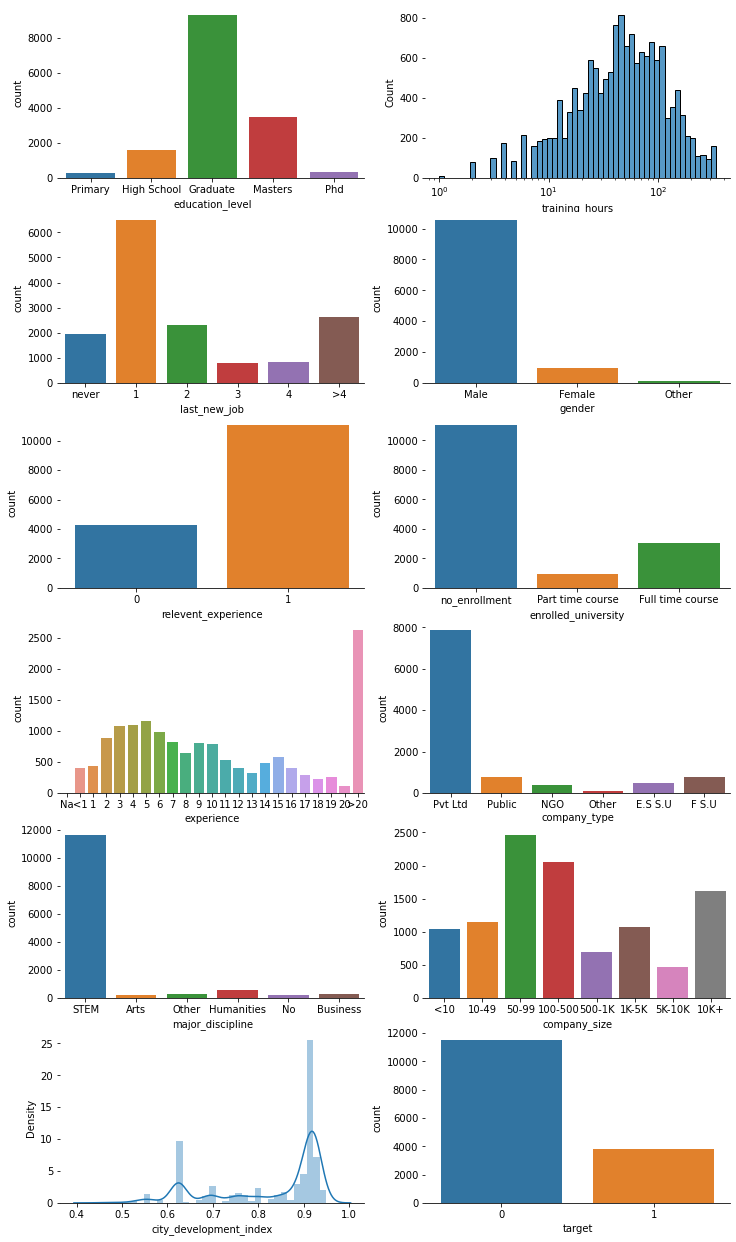

In [1301]:
f, axes = plt.subplots(6, 2, figsize=(12,22))
sns.despine(left=True)

df.education_level[df.education_level=='Primary School'] = 'Primary'
sns.countplot(df.education_level,order= ['Primary','High School','Graduate','Masters','Phd'],ax=axes[0,0])
sns.histplot(df.training_hours,log_scale=True, ax=axes[0, 1])
sns.countplot(df.last_new_job,order= ['never','1','2','3','4','>4'],ax=axes[1, 0])
sns.countplot(df.gender,ax=axes[1,1])
sns.countplot(df.enrolled_university,order= ['no_enrollment','Part time course' ,'Full time course'],ax=axes[2, 1])

df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1
sns.countplot(df.relevent_experience,ax=axes[2, 0])
sns.countplot(df.experience, order= ['Na','<1', '1','2','3', '4', '5', '6','7', '8','9','10','11','12',
                                     '13','14','15','16','17','18','19','20', '>20'],ax=axes[3, 0])
df.company_type[df.company_type=='Early Stage Startup'] = 'E.S S.U'
df.company_type[df.company_type=='Public Sector'] = 'Public'
df.company_type[df.company_type=='Funded Startup'] = 'F S.U'
sns.countplot(df.company_type,ax=axes[3, 1])

df.major_discipline[df.major_discipline=='Business Degree'] = 'Business'
df.major_discipline[df.major_discipline=='No Major'] = 'No'
sns.countplot(df.major_discipline,ax=axes[4, 0])
df.company_size[df.company_size=='àå÷-49' ] = '10-49'
df.company_size[df.company_size=='500-999'] = '500-1K'
df.company_size[df.company_size=='1000-4999'] = '1K-5K'
df.company_size[df.company_size=='5000-9999'] = '5K-10K'
df.company_size[df.company_size=='10000+'] = '10K+'
sns.countplot(df.company_size,order = ['<10','10-49','50-99','100-500','500-1K', '1K-5K','5K-10K','10K+'],ax=axes[4, 1])


sns.distplot(df.city_development_index,ax=axes[5, 0])

sns.countplot(df.target,ax=axes[5, 1])


plt.savefig('Exploratory data analysis.png')

df.relevent_experience[df.relevent_experience==0] = 'No relevent experience'
df.relevent_experience[df.relevent_experience==1] = 'Has relevent experience'






<AxesSubplot:>

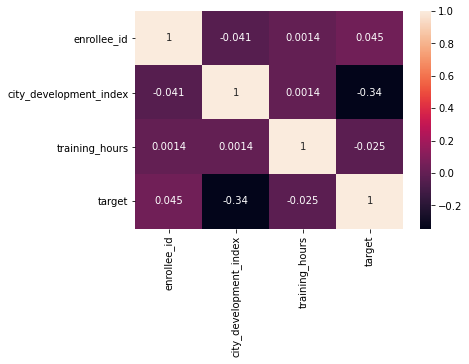

In [1302]:
corrMatrix = df.corr(method='pearson')
sns.heatmap(corrMatrix, annot=True)

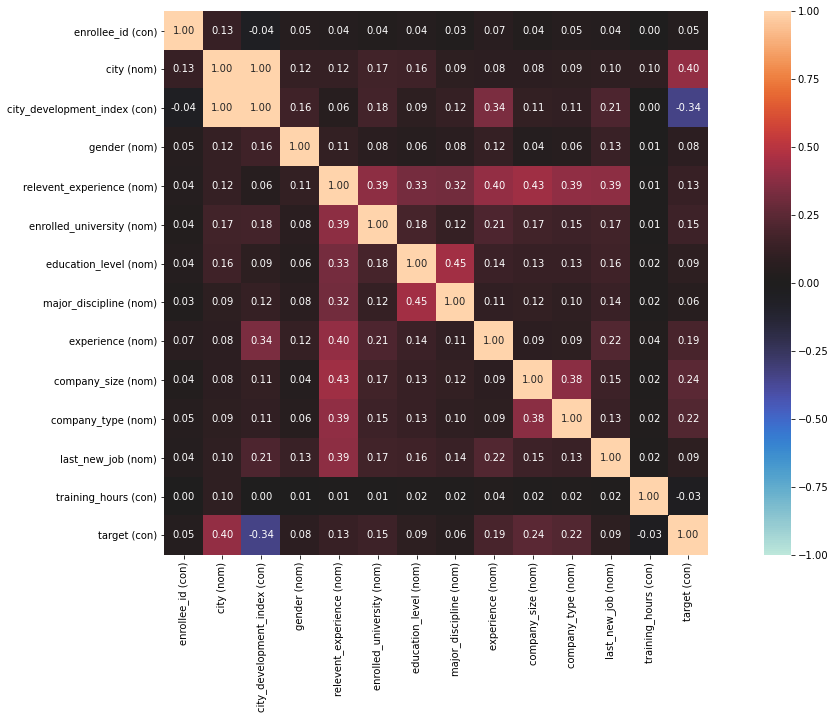

In [1303]:
dt.nominal.associations(df,figsize=(20,10),mark_columns=True);

# Other Visualization with target variable

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


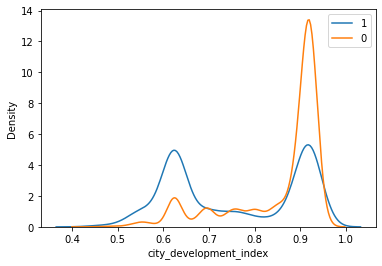

In [1304]:
sns.distplot(df[df['target'] == 1]['city_development_index'],hist=False, kde=True, label='1')
sns.distplot(df[df['target'] == 0]['city_development_index'], hist=False, kde=True, label='0')
plt.legend()
plt.show()

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


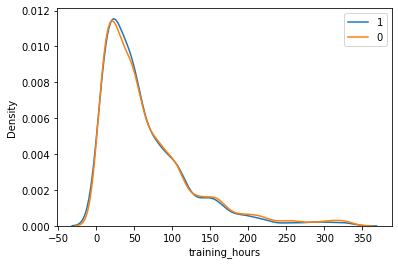

In [1305]:
sns.distplot(df[df['target'] == 1]['training_hours'],hist=False, kde=True, label='1')
sns.distplot(df[df['target'] == 0]['training_hours'], hist=False, kde=True, label='0')
plt.legend()
plt.show()

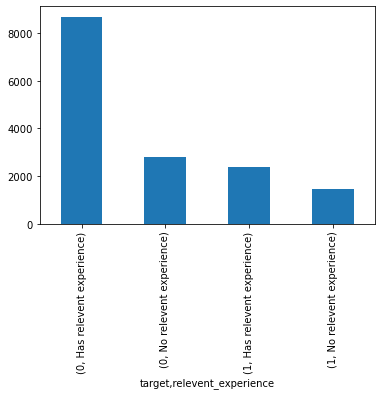

In [1306]:
df.groupby(["target","relevent_experience"]).count()["enrollee_id"].plot(kind="bar")
plt.savefig('relevent_experience VS Target.png')

## Pre-processing
## Dealing with missing values
#### "gender", "company_size", "company_type" - I added an unknown category
#### "enrolled_university", "major_discipline", "education_level", "last_new_job" - fillna with the mode value: "no_enrollment", "STEM"

In [1307]:
df["gender"] = df["gender"].fillna("unknown")
df["company_size"] = df["company_size"].fillna("unknown")
df["company_type"] = df["company_type"].fillna("unknown")
print(df["enrolled_university"].mode())
df["enrolled_university"] = df["enrolled_university"].fillna("no_enrollment")
print(df["major_discipline"].mode())
df["major_discipline"] = df["major_discipline"].fillna("STEM")
print(df["last_new_job"].mode())
df["last_new_job"] = df["last_new_job"].fillna("1")
print(df["education_level"].mode())
df["education_level"] = df["education_level"].fillna("Graduate")

0    no_enrollment
dtype: object
0    STEM
dtype: object
0    1
dtype: object
0    Graduate
dtype: object


### "experience" - cut to 4 level ("low", "low-middle", "middle-high", "high")


In [1308]:
print(df["experience"].unique())
df["experience"] = df["experience"].replace("<1","1")
df["experience"] = df["experience"].replace(">20","20")
df["experience"] = pd.to_numeric(df["experience"])
print(df["experience"].unique())
print(df["experience"].mode())
df["experience"] = df["experience"].fillna(20)
print(df["experience"].value_counts())
bins = [0,5,9,15,20]
labels = ["low", "low-middle", "middle-high", "high"]
df["experience"] = pd.cut(df["experience"], bins= bins, labels= labels)
print(df["experience"].value_counts())

## experience
df["experience"] = df["experience"].replace("low",0)
df["experience"] = df["experience"].replace("low-middle",1)
df["experience"] = df["experience"].replace("middle-high",2)
df["experience"] = df["experience"].replace("high",3)

df.experience= df.experience.astype(int)


['2' '6' '3' '4' '>20' '13' '19' '10' '1' '5' '7' '20' '14' '16' '12' '15'
 '8' '<1' '17' '9' '11' '18' nan]
[ 2.  6.  3.  4. 20. 13. 19. 10.  1.  5.  7. 14. 16. 12. 15.  8. 17.  9.
 11. 18. nan]
0    20.0
dtype: float64
20.0    2783
5.0     1161
4.0     1097
3.0     1084
6.0      979
2.0      889
1.0      841
7.0      825
9.0      804
10.0     789
8.0      636
15.0     572
11.0     525
14.0     478
16.0     403
12.0     393
13.0     313
17.0     282
19.0     249
18.0     223
Name: experience, dtype: int64
low            5072
high           3940
low-middle     3244
middle-high    3070
Name: experience, dtype: int64


df.isna().sum()

In [1309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  15326 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15326 non-null  object 
 6   education_level         15326 non-null  object 
 7   major_discipline        15326 non-null  object 
 8   experience              15326 non-null  int32  
 9   company_size            15326 non-null  object 
 10  company_type            15326 non-null  object 
 11  last_new_job            15326 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  int64  
dtypes: float64(1), int32(1), int64(3), obj

# Feature Representation

### Binary Variable

In [1310]:
df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1
df.relevent_experience = df.relevent_experience.astype(int)

<ipython-input-1310-3454120d1338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
<ipython-input-1310-3454120d1338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1


### LabelEncoder - Order is important

In [1311]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#! pip install category_encoders


In [1312]:
cols = ["education_level", "experience", "last_new_job", "company_size", "enrolled_university"]

## education_level
encoder= ce.OrdinalEncoder(cols=['education_level'],return_df=True,
                           mapping=[{'col':'education_level',
'mapping':{'Primary':0,'High school':1,'Graduate':2,'Masters':3,'Phd':4,}}])
df['education_level'] = encoder.fit_transform(df['education_level'])
df["education_level"] = df["education_level"].replace(-1,1)

## enrolled_university
encoder= ce.OrdinalEncoder(cols=['enrolled_university'],return_df=True,
                           mapping=[{'col':'enrolled_university',
'mapping':{'no_enrollment':0,'Part time course':1,'Full time course':2,}}])
df['enrolled_university'] = encoder.fit_transform(df['enrolled_university'])

## last_new_job
encoder= ce.OrdinalEncoder(cols=['last_new_job'],return_df=True,
                           mapping=[{'col':'last_new_job',
'mapping':{'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}}])
df['last_new_job'] = encoder.fit_transform(df['last_new_job'])

## company_size
encoder= ce.OrdinalEncoder(cols=['company_size'],return_df=True,
                           mapping=[{'col':'company_size',
'mapping':{'unknown':0,'<10':1,'10-49':2,'50-99':3,'100-500':4,'500-1K':5,'1K-5K':6,'5K-10K':7,'10K+':8}}])
df['company_size'] = encoder.fit_transform(df['company_size'])



## Get Dummies - Order is Not important

In [1313]:
## gender
encoder=ce.OneHotEncoder(cols='gender',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.gender)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="gender")
df.head(10)

## major_discipline
encoder=ce.OneHotEncoder(cols='major_discipline',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.major_discipline)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="major_discipline")

## company_type
encoder=ce.OneHotEncoder(cols='company_type',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.company_type)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="company_type")


In [1314]:
df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,major_discipline_Humanities,major_discipline_No,major_discipline_Business,company_type_unknown,company_type_Pvt Ltd,company_type_Public,company_type_NGO,company_type_Other,company_type_E.S S.U,company_type_F S.U
0,13163,16,0.910,0,0,1.0,0,0,0,16,...,0,0,0,1,0,0,0,0,0,0
1,9357,136,0.897,1,0,3.0,1,6,1,262,...,0,0,0,0,1,0,0,0,0,0
2,604,16,0.910,0,0,2.0,0,0,0,24,...,0,0,0,1,0,0,0,0,0,0
3,19033,16,0.910,0,0,1.0,0,0,1,35,...,0,0,0,1,0,0,0,0,0,0
4,4825,145,0.555,1,2,2.0,0,0,1,43,...,0,0,0,1,0,0,0,0,0,0


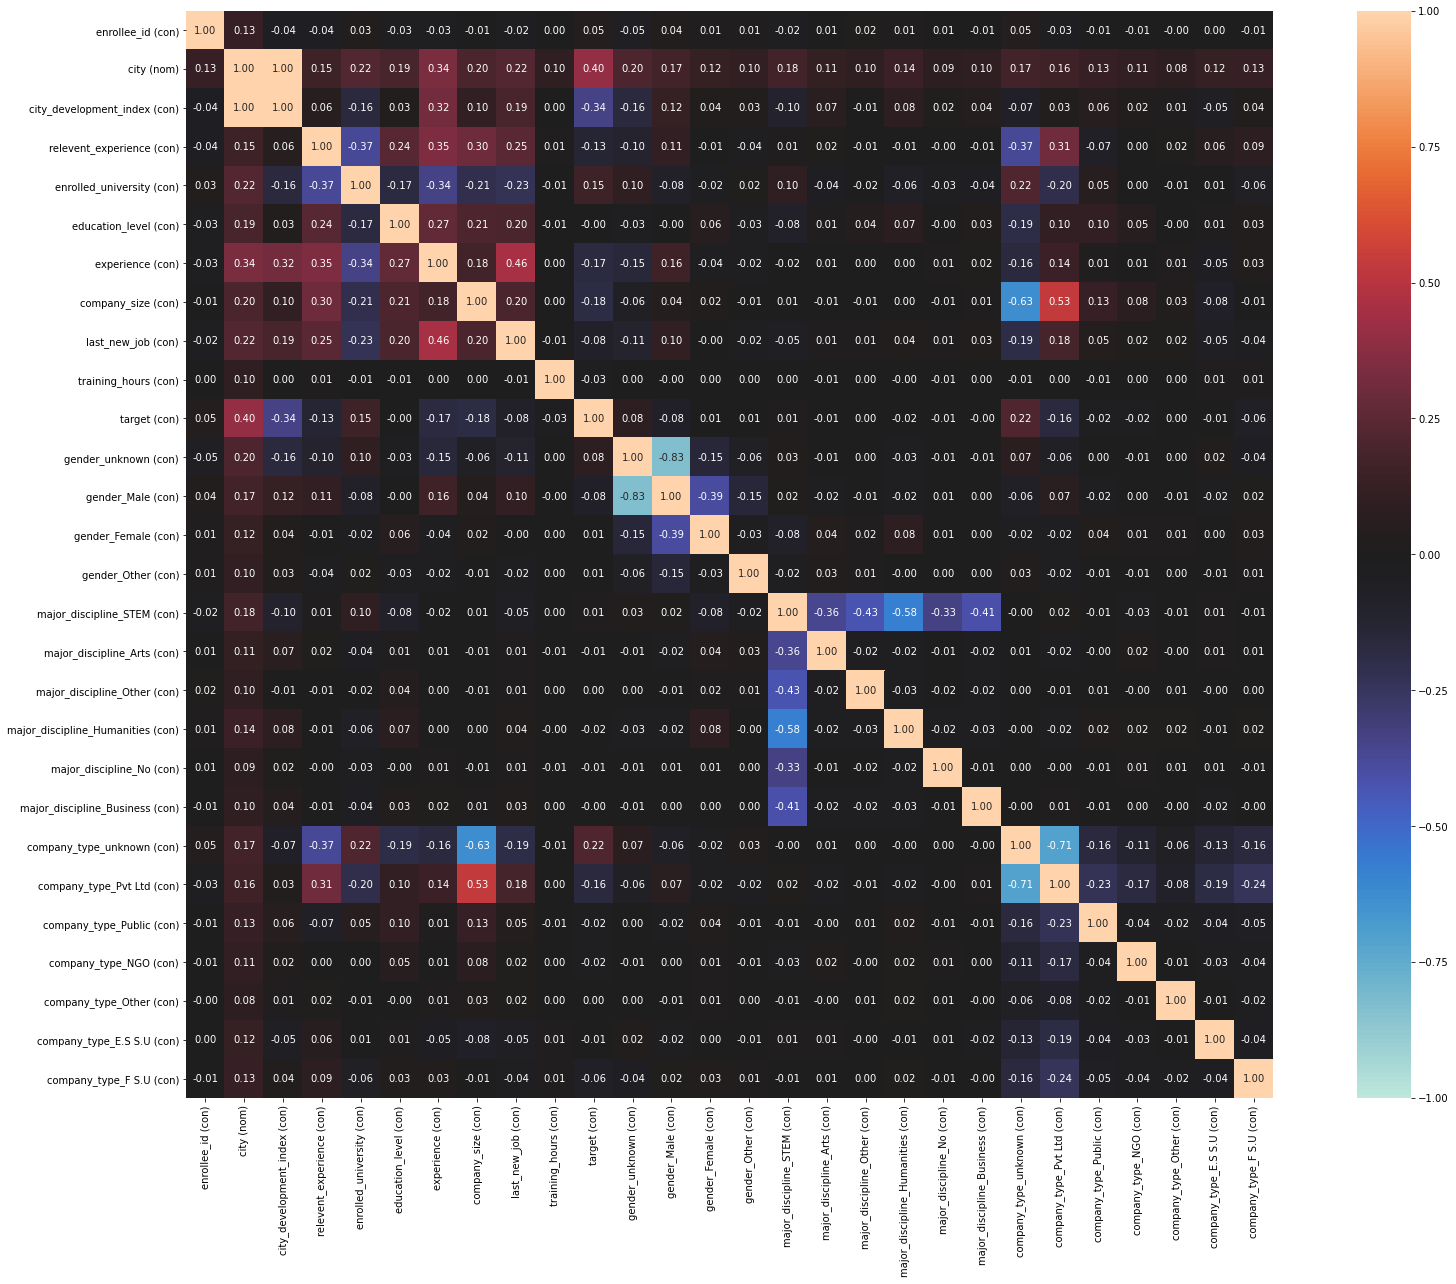

In [1315]:
dt.nominal.associations(df,figsize=(30,20),mark_columns=True);

## Feature Representation

#### Standardization of  continuous Variables

In [1316]:
from sklearn.preprocessing import StandardScaler

features = ['city_development_index','training_hours']
df[features] = StandardScaler().fit_transform(df[features])
df_x = df.drop(columns =["enrollee_id", "city","target"])
df_y = df["target"]
df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,major_discipline_Humanities,major_discipline_No,major_discipline_Business,company_type_unknown,company_type_Pvt Ltd,company_type_Public,company_type_NGO,company_type_Other,company_type_E.S S.U,company_type_F S.U
0,13163,16,0.657186,0,0,1.0,0,0,0,-0.822220,...,0,0,0,1,0,0,0,0,0,0
1,9357,136,0.551630,1,0,3.0,1,6,1,3.277426,...,0,0,0,0,1,0,0,0,0,0
2,604,16,0.657186,0,0,2.0,0,0,0,-0.688898,...,0,0,0,1,0,0,0,0,0,0
3,19033,16,0.657186,0,0,1.0,0,0,1,-0.505581,...,0,0,0,1,0,0,0,0,0,0
4,4825,145,-2.225316,1,2,2.0,0,0,1,-0.372259,...,0,0,0,1,0,0,0,0,0,0


In [1317]:

# Separating out the features to standartized - only continues one's

# df_x_cat = df.to_numpy()
# df_x_cat.head()

# df_x_conti = df.loc[:, features].values
# # Separating out the target
# df_y = df.loc[:,['target']].values
# # Standardizing the features
# df_x_conti = StandardScaler().fit_transform(df_x_conti)
# df_x = np.concatenate((df_x_cat,df_x_conti),axis=1)

### Mutual Information

In [1318]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(df_x, df_y)
mutual_info


array([0.06767849, 0.00547458, 0.01008293, 0.00124437, 0.01820077,
       0.02931696, 0.00761329, 0.        , 0.        , 0.00301276,
       0.00682993, 0.        , 0.00115745, 0.        , 0.00106423,
       0.00190325, 0.        , 0.        , 0.02280054, 0.01341077,
       0.00229916, 0.00069837, 0.00449386, 0.00425545, 0.00317598])

In [1319]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_x.columns
mutual_info.sort_values(ascending=False)

city_development_index         0.067678
company_size                   0.029317
company_type_unknown           0.022801
experience                     0.018201
company_type_Pvt Ltd           0.013411
enrolled_university            0.010083
last_new_job                   0.007613
gender_Female                  0.006830
relevent_experience            0.005475
company_type_Other             0.004494
company_type_E.S S.U           0.004255
company_type_F S.U             0.003176
gender_Male                    0.003013
company_type_Public            0.002299
major_discipline_Humanities    0.001903
education_level                0.001244
major_discipline_STEM          0.001157
major_discipline_Other         0.001064
company_type_NGO               0.000698
gender_Other                   0.000000
major_discipline_Arts          0.000000
major_discipline_No            0.000000
major_discipline_Business      0.000000
gender_unknown                 0.000000
training_hours                 0.000000


<AxesSubplot:>

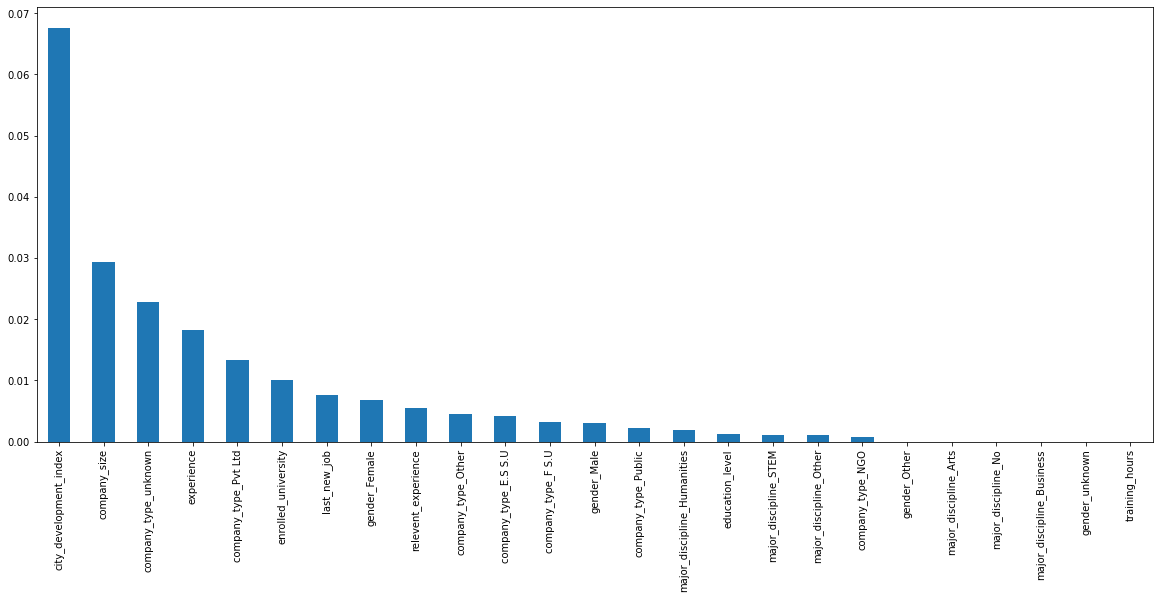

In [1320]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [1321]:
# from sklearn.feature_selection import SelectKBest
# sel_five_cols = SelectKBest(mutual_info_classif, k=5)
# sel_five_cols.fit(df_x, df_y)
# df_x.columns[sel_five_cols.get_support()]

In [1322]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(df_x, df_y)
best = df_x.columns[sel_five_cols.get_support()]
df_xx = df[best]
df_xx.head()

,city_development_index,experience,company_size,company_type_unknown,company_type_Pvt Ltd
0,0.657186,0,0,1,0
1,0.551630,1,6,0,1
2,0.657186,0,0,1,0
3,0.657186,0,0,1,0
4,-2.225316,0,0,1,0


In [1323]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [1324]:
lgr_m = LGR(random_state=0).fit(df_x, df_y)
sfs_selector = SFS(estimator=lgr_m, n_features_to_select = 5, cv =10, direction ="forward")
sfs_selector.fit(df_x, df_y)
df_x.columns[sfs_selector.get_support()]

C:\Users\peleg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['city_development_index', 'gender_Other', 'major_discipline_Arts',
       'company_type_Other', 'company_type_F S.U'],
      dtype='object')

## PCA AND STANDARTIZATION

In [1325]:
from sklearn.decomposition import PCA
df_x = df_xx
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

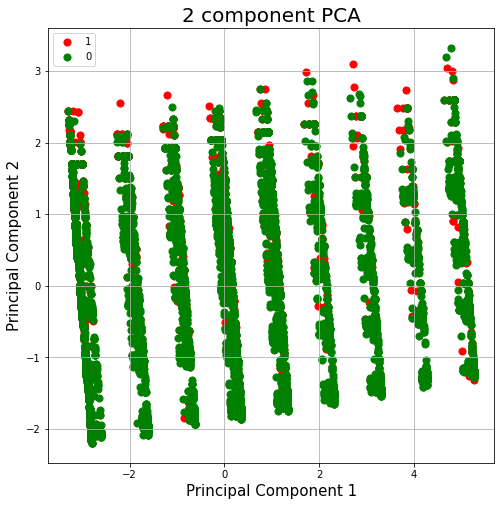

In [1326]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [1328]:
pca.explained_variance_ratio_

array([0.73763209, 0.15511126])